In [ ]:
!wget https://archive.ics.uci.edu/static/public/186/wine+quality.zip

--2023-12-31 12:20:11--  https://archive.ics.uci.edu/static/public/186/wine+quality.zip
Resolving archive.ics.uci.edu (archive.ics.uci.edu)... 128.195.10.252
Connecting to archive.ics.uci.edu (archive.ics.uci.edu)|128.195.10.252|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified
Saving to: ‘wine+quality.zip’

wine+quality.zip        [ <=>                ]  89.21K  --.-KB/s    in 0.03s   

2023-12-31 12:20:12 (3.46 MB/s) - ‘wine+quality.zip’ saved [91353]



In [ ]:
!unzip /content/wine+quality.zip -d /content/data

Archive:  /content/wine+quality.zip
  inflating: /content/data/winequality-red.csv  
  inflating: /content/data/winequality-white.csv  
  inflating: /content/data/winequality.names  


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.inspection import DecisionBoundaryDisplay


In [ ]:
file_path = '/content/data/winequality-red.csv'
df = pd.read_csv(file_path, sep=';')
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


<Axes: >

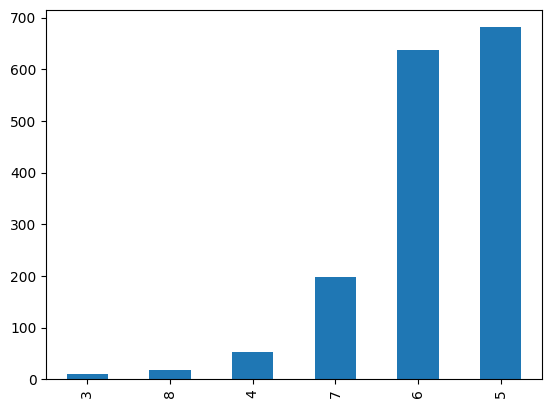

In [ ]:
df['quality'].value_counts().sort_values().plot(kind='bar')

In [ ]:
columns = df.columns

In [ ]:
X, Y = df[columns[0:-1]], df[columns[-1]]
scaler = MinMaxScaler()
X_new = scaler.fit_transform(X)
Y = Y.copy()
Y.loc[(Y<=4)]=3
Y.loc[(Y<=6) & (Y>4 )] = 2
Y.loc[(Y>6)] = 1
#Y_new = pd.get_dummies(Y) # One hot encode

X_train, X_test, Y_train, y_test = \
train_test_split(X_new, Y, test_size=0.4, random_state=333)


In [ ]:
classifier = LogisticRegression(random_state=0)

In [ ]:
classifier.fit(X_train,Y_train)

LogisticRegression(random_state=0)

In [ ]:
y_pred = classifier.predict(X_test)

In [ ]:
# Calculate R-squared value
acc = accuracy_score(y_test, y_pred)
print(f"Accuracy: {acc*100}%")

# Calculate Mean Squared Error
cr = classification_report(y_test, y_pred)
print("Classification Report:\n", cr)

Accuracy: 82.5%
Classification Report:
               precision    recall  f1-score   support

           1       0.75      0.16      0.27        93
           2       0.83      0.99      0.90       518
           3       0.00      0.00      0.00        29

    accuracy                           0.82       640
   macro avg       0.53      0.38      0.39       640
weighted avg       0.78      0.82      0.77       640



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


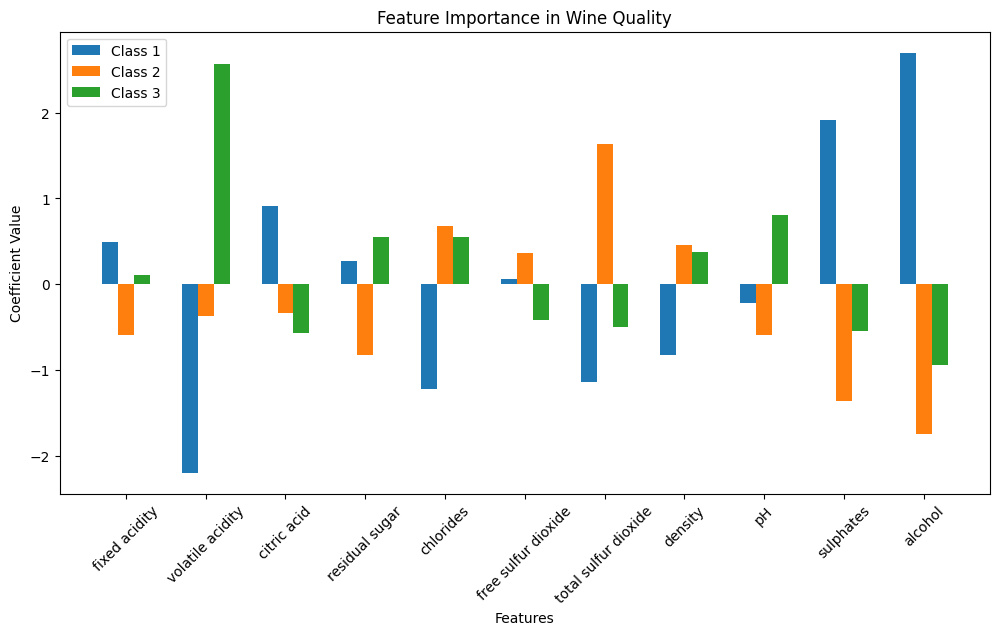

In [ ]:

coefficients = classifier.coef_

feature_names = columns[0:-1]

n_features = coefficients.shape[1]

# Plotting
fig, ax = plt.subplots(figsize=(12, 6))
for i in range(coefficients.shape[0]):
    # Plot each class's coefficients
    ax.bar(np.arange(n_features) + i * 0.2, coefficients[i], width=0.2, label=f'Class {i+1}')

ax.set_xticks(np.arange(n_features) + 0.2)
ax.set_xticklabels(feature_names)
plt.xticks(rotation=45)
plt.xlabel('Features')
plt.ylabel('Coefficient Value')
plt.title('Feature Importance in Wine Quality')
plt.legend()
plt.show()


